# Import Library


In [ ]:
import re
import string
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from collections import defaultdict

import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.optimizers import Adam
from keras import initializers as initializers, regularizers, constraints
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.models import Model

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Preparing Data

In [ ]:
# Install Kaggle
! pip install -q kaggle

In [ ]:
# Upload Kaggle API Token
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"duwipurnamasidik","key":"38cca188aeda70bb69b87b81b244f260"}'}

In [ ]:
# Created Kaggle Folder
! mkdir ~/.kaggle

# Copy Kaggle.json
! cp kaggle.json ~/.kaggle/

In [ ]:
# Change the permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# List dataset in kaggle
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31            490         23  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36            500         22  1.0              
ebrahimelgazar/new-york-city-airbnb-market                      New York City Airbnb Market                    1MB  2023-01-03 13:41:12            379         22  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete D

In [ ]:
# Download Dataset
!kaggle datasets download -d datasnaek/mbti-type
!kaggle datasets download -d zeyadkhalid/mbti-personality-types-500-dataset

 57% 14.0M/24.4M [00:00<00:00, 143MB/s]
100% 24.4M/24.4M [00:00<00:00, 179MB/s]
 79% 98.0M/123M [00:00<00:00, 227MB/s]
100% 123M/123M [00:00<00:00, 216MB/s] 


In [ ]:
# unzip Dataset
! unzip mbti-type.zip
! unzip mbti-personality-types-500-dataset.zip

Archive:  mbti-type.zip
  inflating: mbti_1.csv              
Archive:  mbti-personality-types-500-dataset.zip
  inflating: MBTI 500.csv            


In [ ]:
# Membaca Data
MBTI1 = pd.read_csv('mbti_1.csv')
MBTI2 = pd.read_csv('MBTI 500.csv')

In [ ]:
print(MBTI1.info())
print(MBTI2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB
None


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


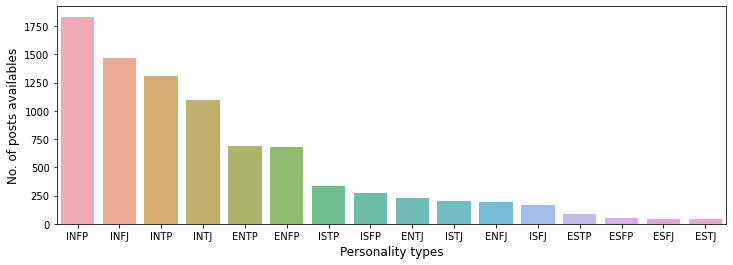

In [ ]:
cnt_srs = MBTI1['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


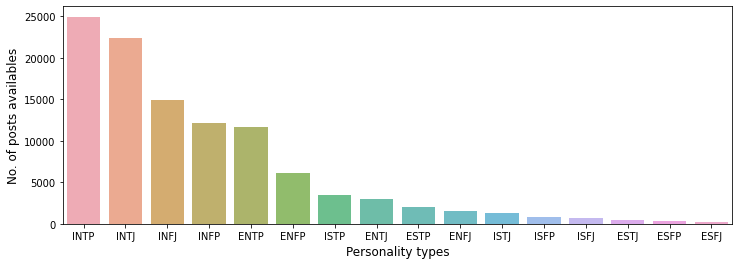

In [ ]:
cnt_srs = MBTI2['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

In [ ]:
frames = [MBTI1, MBTI2]
MBTI = pd.concat(frames).drop_duplicates().reset_index(drop=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


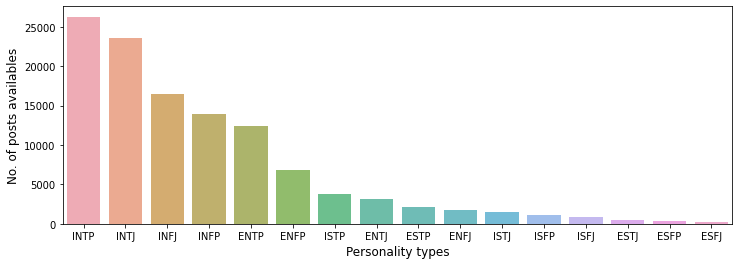

In [ ]:
cnt_srs = MBTI['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

In [ ]:
# Memotong Data Sama Bayak yaitu 223
intp_df=MBTI[MBTI["type"]=="INTP"].sample(223)
intj_df=MBTI[MBTI["type"]=="INTJ"].sample(223)
infj_df=MBTI[MBTI["type"]=="INFJ"].sample(223)
infp_df=MBTI[MBTI["type"]=="INFP"].sample(223)
entp_df=MBTI[MBTI["type"]=="ENTP"].sample(223)
enfp_df=MBTI[MBTI["type"]=="ENFP"].sample(223)
istp_df=MBTI[MBTI["type"]=="ISTP"].sample(223)
entj_df=MBTI[MBTI["type"]=="ENTJ"].sample(223)
estp_df=MBTI[MBTI["type"]=="ESTP"].sample(223)
enfj_df=MBTI[MBTI["type"]=="ENFJ"].sample(223)
istj_df=MBTI[MBTI["type"]=="ISTJ"].sample(223)
isfp_df=MBTI[MBTI["type"]=="ISFP"].sample(223)
isfj_df=MBTI[MBTI["type"]=="ISFJ"].sample(223)
estj_df=MBTI[MBTI["type"]=="ESTJ"].sample(223)
esfp_df=MBTI[MBTI["type"]=="ESFP"].sample(223)
esfj_df=MBTI[MBTI["type"]=="ESFJ"].sample(223)

In [ ]:
df=pd.concat([intp_df, intj_df, infj_df, infp_df, entp_df, enfp_df, istp_df, entj_df, estp_df, enfj_df, istj_df, isfp_df, isfj_df, estj_df, esfp_df, esfj_df], axis=0)
df=df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    3568 non-null   object
 1   posts   3568 non-null   object
dtypes: object(2)
memory usage: 55.9+ KB


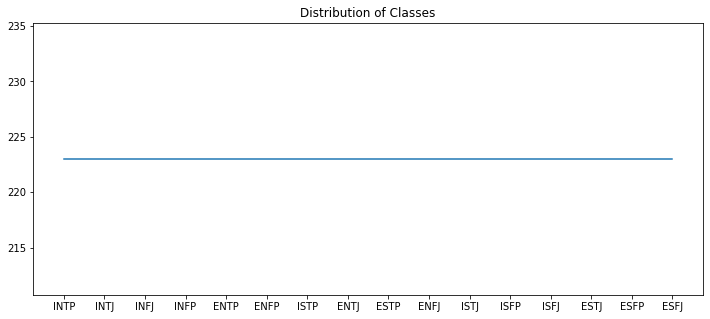

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [ ]:
df.head()

,type,posts
0,INTP,wife istj many best friend enfps maybe weird s...
1,INTP,observe logical inconsistency story though har...
2,INTP,pint pub maybe break bro exactly think well ki...
3,INTP,search hud without put anything could conceiva...
4,INTP,suddenly moral approach someone believe god un...


# Preprocesing Data

## Clean Text

In [ ]:
#regular expressions for tokenization
str_punc = string.punctuation

url_regex = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|as|m|o|there|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""

In [ ]:
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()
cachedStopWords = stopwords.words("english")

def clean_text(df, remove_stop_words=True):
    df_length = []
    cleaned_text = []
    for text in df.posts:
        #case folding
        text = text.lower()

        text = re.sub('http.*?([ ]|\|\|\||$)', ' ', text)

        text = re.sub(url_regex, ' ', text)

        text = re.sub('['+re.escape(str_punc)+']'," ",  text)

        text = re.sub('(\[|\()*\d+(\]|\))*', ' ', text)

        # Remove string marks
        text = re.sub('[’‘“\.”…–]', '', text)
        text = re.sub('[^(\w|\s)]', '', text)
        text = re.sub('(gt|lt)', '', text)

        if remove_stop_words:
            text = " ".join([lemmatiser.lemmatize(w) for w in text.split(' ') if w not in cachedStopWords])
        else:
            text = " ".join([lemmatiser.lemmatize(w) for w in text.split(' ')])

        df_length.append(len(text.split()))
        cleaned_text.append(text)
    return cleaned_text
df.posts = clean_text(df, remove_stop_words=True)
df.head()

,type,posts
0,INTP,wife istj many best friend enfps maybe weird s...
1,INTP,observe logical inconsistency story though har...
2,INTP,pint pub maybe break bro exactly think well ki...
3,INTP,search hud without put anything could conceiva...
4,INTP,suddenly moral approach someone believe god un...


In [ ]:
df.to_csv('data-clean.csv')

# Exploratory Data Analysis

## Wordcloud

### Wordcloud All Category

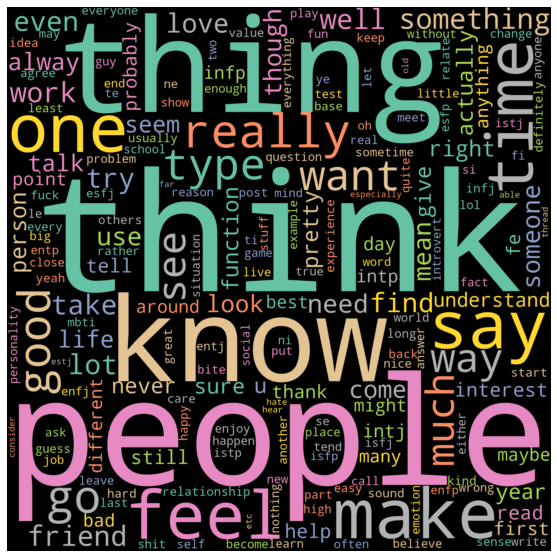

In [ ]:
text = " ".join(review for review in df.posts.astype(str))

wordcloud = WordCloud(width = 2000, height = 2000, random_state=1, background_color='black', colormap='Set2',
               collocations=False).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud Per Category

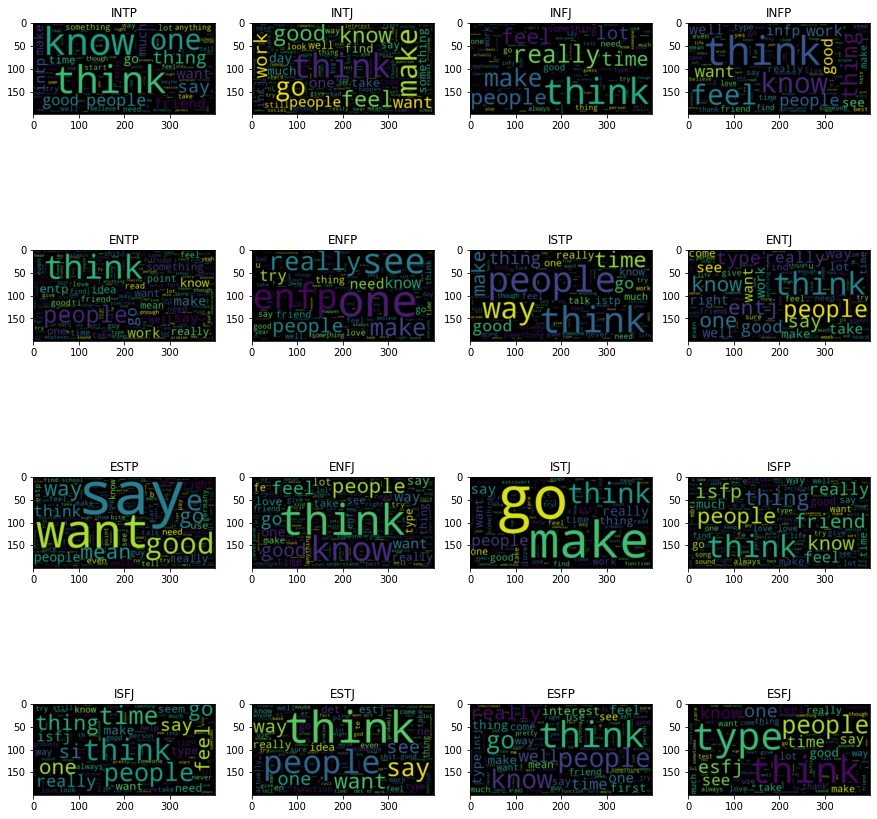

In [ ]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

## Frekuensi Kata

In [ ]:
def create_corpus(data):
    corpus = []
    for text in data.posts.str.split():
        for i in text:
            corpus.append(i)
    return corpus

### Frekuensi Semua Kata Top 15

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Frequency of Top 15 words in posts')]

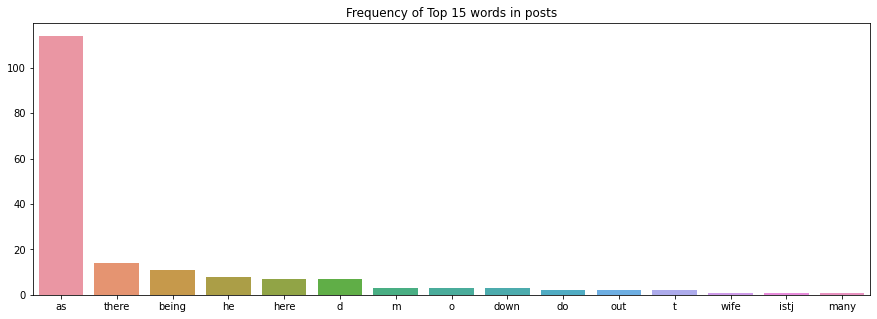

In [ ]:
corpus = create_corpus(df)

dic = defaultdict(int)
for word in corpus:
    if word in cachedStopWords:
        dic[word] += 1
    else:
        dic[word] = 1

top = sorted(dic.items() , key = lambda x:x[1] , reverse = True)[:15]

plt.figure(figsize = (15,5))
x , y = zip(*top)
sns.barplot(list(x) , list(y)).set(title = 'Frequency of Top 15 words in posts')

### Frekuensi Kata per category top 15

In [ ]:
def category_top15(df,category):
    dx = df[df.type == category]
    corpus = create_corpus(dx)
    dic = defaultdict(int)
    for word in corpus:
        if word in cachedStopWords:
            dic[word] += 1
        else:
            dic[word] = 1

    top = sorted(dic.items() , key = lambda x:x[1] , reverse = True)[:15]

    plt.figure(figsize = (15,5))
    x , y = zip(*top)
    sns.barplot(list(x) , list(y)).set(title = 'Frequency of Top 15 words in this '+ category)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

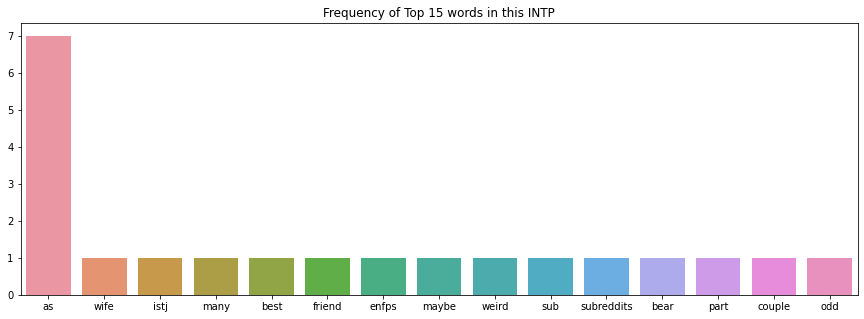

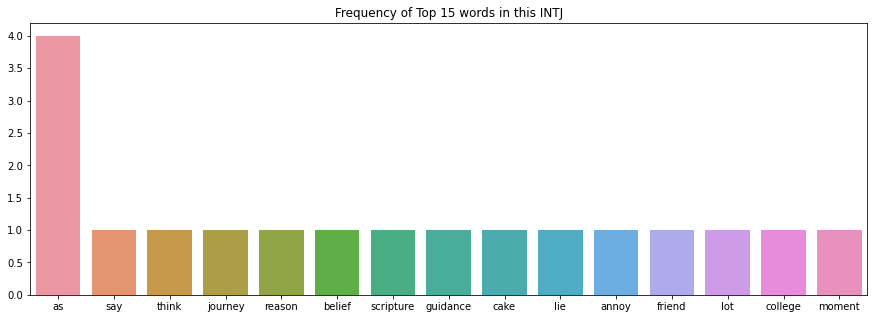

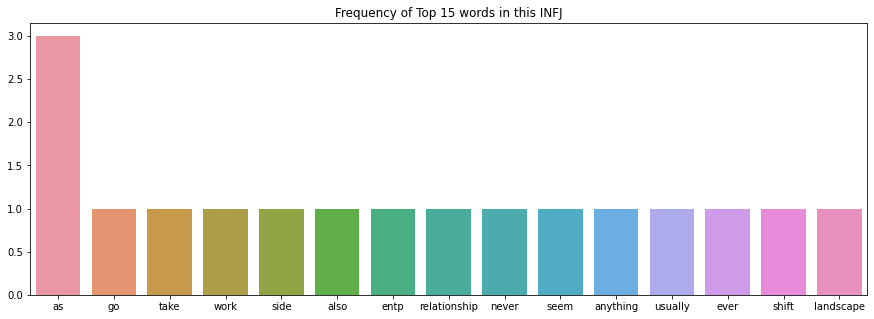

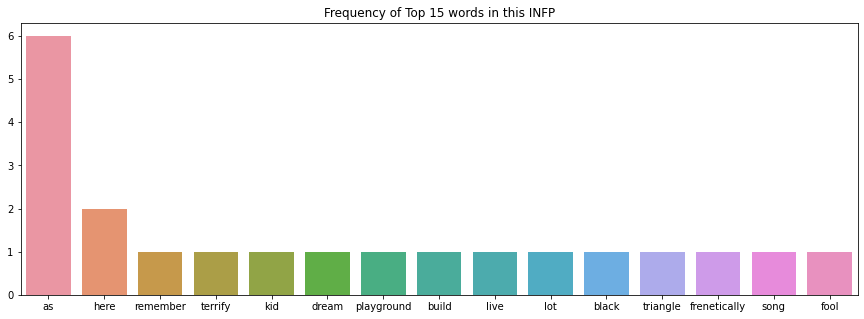

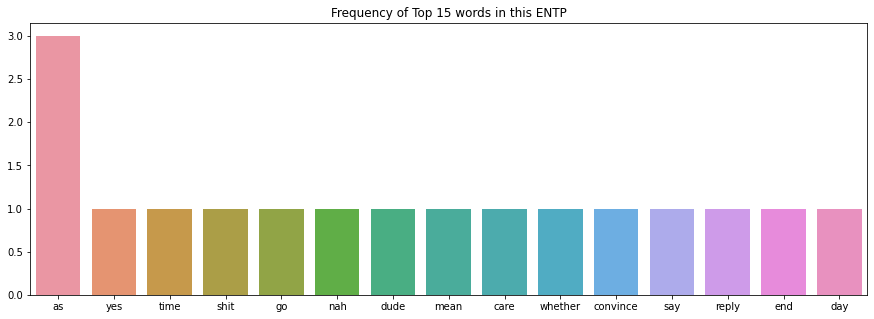

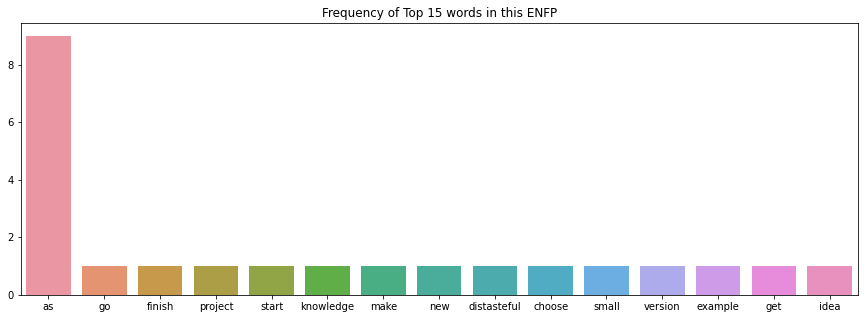

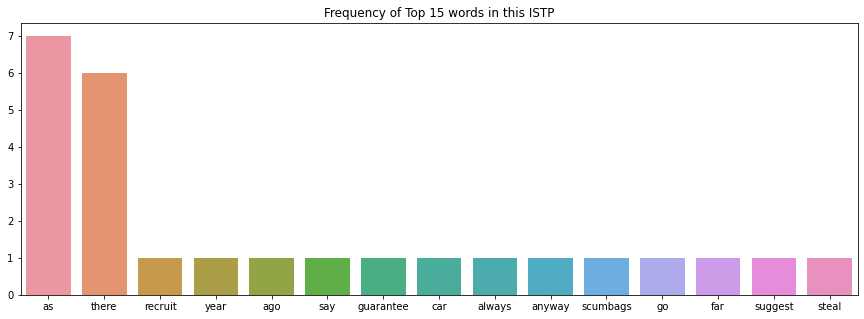

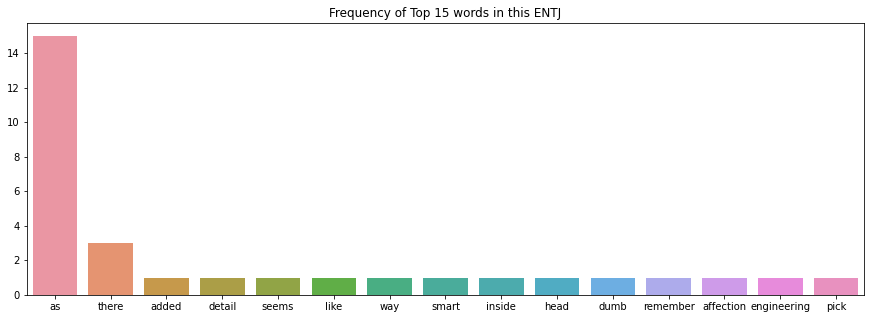

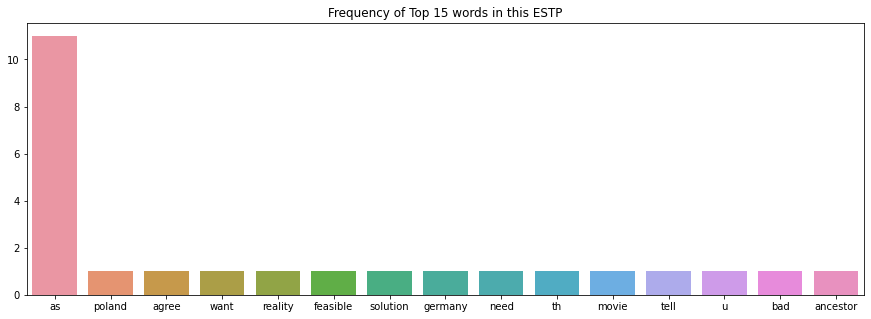

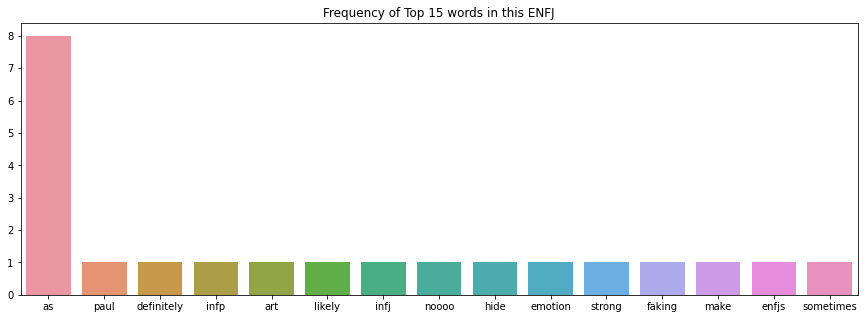

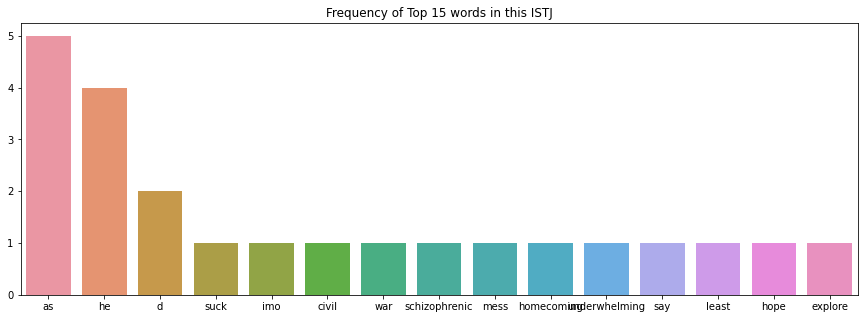

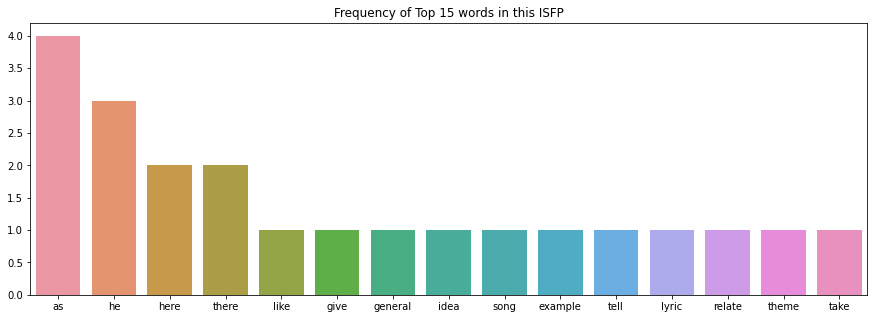

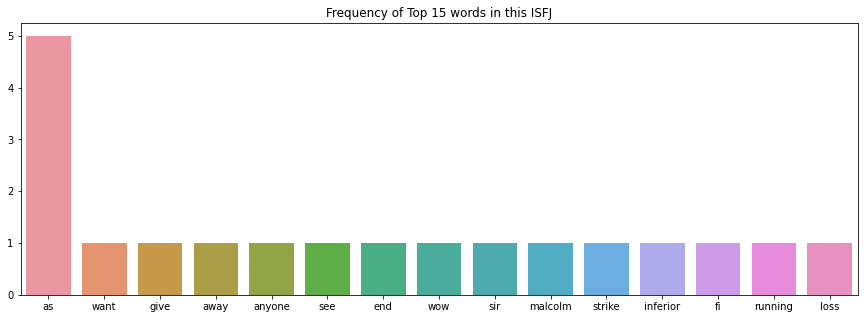

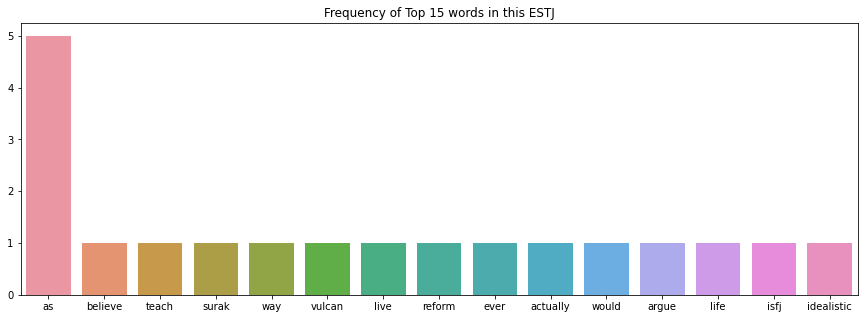

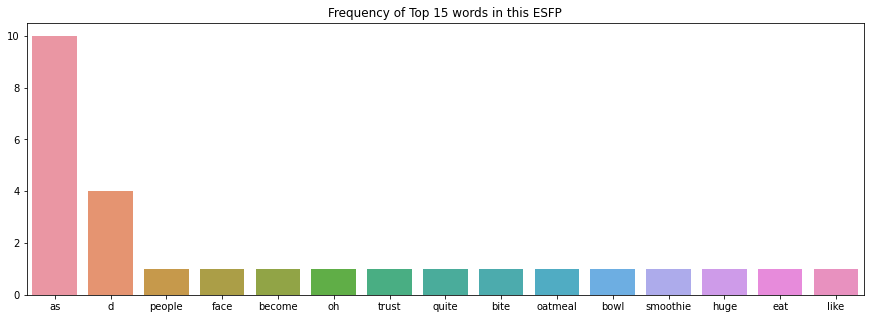

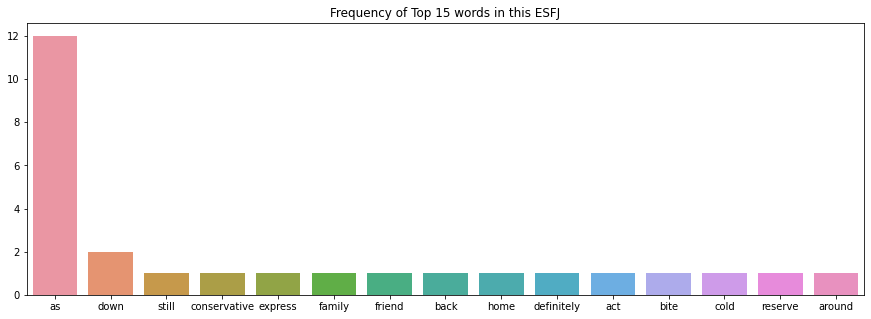

In [ ]:
categories = df.type.unique()
for i in categories:
    category_top15(df,i)

# Memisahkan Data Latih dan Uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['posts'], df['type'], test_size = 0.2, random_state = 0)

# Ekstrasi Fitur

## Menghitung Term Frequency (TF)

In [ ]:
count_vect=CountVectorizer()
df_train_tf=count_vect.fit(X_train)
df_test_tf=count_vect.fit(X_test)
print(df_train_tf.vocabulary_)
print(df_test_tf.vocabulary_)

{'shit': 17421, 'white': 21470, 'sake': 16802, 'freedom': 7409, 'speech': 18217, 'bless': 2008, 'sub': 18743, 'lol': 11412, 'censor': 2882, 'cnn': 3312, 'love': 11494, 'estp': 6265, 'grandma': 8115, 'know': 10753, 'right': 16483, 'thank': 19484, 'yeah': 21881, 'something': 18074, 'like': 11257, 'cross': 4145, 'mind': 12316, 'issue': 10191, 'tell': 19363, 'sexual': 17298, 'urge': 20737, 'sense': 17196, 'little': 11343, 'scar': 16939, 'timid': 19698, 'convey': 3871, 'talk': 19206, 'much': 12727, 'want': 21240, 'pleasure': 14797, 'time': 19689, 'surprise': 18960, 'feel': 6831, 'weird': 21373, 'becaue': 1679, 'sex': 17293, 'guy': 8314, 'seek': 17114, 'ask': 1107, 'please': 14792, 'put': 15544, 'yet': 21906, 'think': 19568, 'okay': 13615, 'wait': 21196, 'marriage': 11856, 'take': 19189, 'table': 19146, 'never': 13106, 'laugh': 11000, 'suck': 18814, 'idk': 9249, 'get': 7854, 'marry': 11859, 'involve': 10088, 'document': 5251, 'prepare': 15129, 'divorce': 5219, 'direct': 4980, 'communication'

In [ ]:
df_train_transform= df_train_tf.transform(X_train)
df_test_transform= df_test_tf.transform(X_test)

In [ ]:
print(df_train_transform.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Menghitung TF-IDF

In [ ]:
tfidf_transformer=TfidfTransformer()

# TF-IDF Data train
df_train_tfidf=tfidf_transformer.fit(df_train_transform.toarray())
df_train_tfidf_tran = df_train_tfidf.transform(df_train_transform.toarray())

# TF-IDF Data test
df_test_tfidf=tfidf_transformer.fit(df_test_transform)
df_test_tfidf_tran = df_test_tfidf.transform(df_test_transform)

print(df_train_tfidf_tran)
print(df_test_tfidf_tran)

  (0, 21935)	0.033838865345594805
  (0, 21881)	0.020496675276369444
  (0, 21745)	0.02389842189751126
  (0, 21716)	0.01334268393277701
  (0, 21678)	0.07789406188573232
  (0, 21676)	0.030868082419287828
  (0, 21652)	0.06147325425360238
  (0, 21637)	0.031724780658594576
  (0, 21480)	0.026883785441247306
  (0, 21423)	0.02841812022523511
  (0, 21384)	0.014796861480970078
  (0, 21373)	0.030703413660259412
  (0, 21354)	0.030222489443802524
  (0, 21304)	0.014115685629660821
  (0, 21278)	0.027408277932779036
  (0, 21240)	0.1417063277628028
  (0, 21106)	0.07256576308988547
  (0, 21055)	0.062397046387992657
  (0, 21033)	0.08426175323614706
  (0, 20990)	0.03122328546341185
  (0, 20829)	0.08044371299227746
  (0, 20806)	0.05437081535556546
  (0, 20755)	0.033286399722279876
  (0, 20656)	0.05186935694720376
  (0, 20557)	0.030836127347490035
  :	:
  (2853, 1428)	0.03109802229246456
  (2853, 1327)	0.04211987087018891
  (2853, 1247)	0.03381313134034271
  (2853, 1165)	0.052428444540671006
  (2853, 1077)	0

# Modeling

## Naive Bayes

### Hyperparameter

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}
clf = GridSearchCV(text_clf, tuned_parameters, cv=10, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

best_accuracy = clf.best_score_
best_param = clf.best_params_

print('Hyperparameter terbaik : ',best_param)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Hyperparameter terbaik :  {'clf__alpha': 0.01, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}


### Training

In [ ]:
clf.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [1, 0.1, 0.01],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False),
                         'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             verbose=1)

### Testing

In [ ]:
pred_nb = clf.predict(X_test)
akurasi_nb = accuracy_score(y_test,pred_nb)
print('Testing Naive Bayes')
print('Akurasi : ', akurasi_nb)

Testing Naive Bayes
Akurasi :  0.6022408963585434


## LSTM

### Tokenisasi

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10600
# Max number of words in each posts.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['posts'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 49499 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['posts'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
Y = pd.get_dummies(df['type']).values

In [ ]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Training

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_LSTM.add(Dense(16, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model_LSTM.fit(X_train_lstm, y_train_lstm, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
41/41 [==============================] - 85s 2s/step - loss: 2.7728 - accuracy: 0.0674 - val_loss: 2.7673 - val_accuracy: 0.0944
Epoch 2/10
41/41 [==============================] - 76s 2s/step - loss: 2.7468 - accuracy: 0.1394 - val_loss: 2.7463 - val_accuracy: 0.1259
Epoch 3/10
41/41 [==============================] - 75s 2s/step - loss: 2.6383 - accuracy: 0.2909 - val_loss: 2.6737 - val_accuracy: 0.1189
Epoch 4/10
41/41 [==============================] - 77s 2s/step - loss: 2.4272 - accuracy: 0.2656 - val_loss: 2.5782 - val_accuracy: 0.1503
Epoch 5/10
41/41 [==============================] - 77s 2s/step - loss: 2.0528 - accuracy: 0.3349 - val_loss: 2.6502 - val_accuracy: 0.1573
Epoch 6/10
41/41 [==============================] - 76s 2s/step - loss: 1.6784 - accuracy: 0.4942 - val_loss: 2.8137 - val_accuracy: 0.1503
Epoch 7/10
41/41 [==============================] - 76s 2s/step - loss: 1.2946 - accuracy: 0.6480 - val_loss: 3.0175 - val_accuracy: 0.1503


### Testing

In [ ]:
akurasi_LSTM = model_LSTM.evaluate(X,Y)
print('Testing LSTM\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(akurasi_LSTM[0],akurasi_LSTM[1]))

112/112 [==============================] - 14s 129ms/step - loss: 1.5096 - accuracy: 0.6096
Testing LSTM
  Loss: 1.510
  Accuracy: 0.610


# Evaluasi 2 Model

## Naive Bayes

In [ ]:
cm_nb = classification_report(y_test,pred_nb)
print(cm_nb)

              precision    recall  f1-score   support

        ENFJ       0.39      0.74      0.51        35
        ENFP       0.25      0.59      0.36        32
        ENTJ       0.96      0.63      0.76        41
        ENTP       0.71      0.52      0.60        52
        ESFJ       0.87      0.79      0.83        52
        ESFP       0.55      0.90      0.68        42
        ESTJ       1.00      0.63      0.78        52
        ESTP       0.88      0.91      0.90        33
        INFJ       0.65      0.28      0.39        61
        INFP       0.51      0.45      0.48        40
        INTJ       0.59      0.72      0.65        47
        INTP       0.51      0.53      0.52        45
        ISFJ       0.55      0.55      0.55        40
        ISFP       0.44      0.51      0.48        47
        ISTJ       0.63      0.42      0.51        40
        ISTP       0.89      0.62      0.73        55

    accuracy                           0.60       714
   macro avg       0.65   

## LSTM

In [ ]:
y_prediction = model_LSTM.predict(X)

112/112 [==============================] - 15s 131ms/step


In [ ]:
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(Y, axis=1)

result = classification_report(y_test, y_prediction)
print(result)

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       223
           1       0.70      0.61      0.65       223
           2       0.65      0.58      0.61       223
           3       0.68      0.28      0.40       223
           4       0.55      0.58      0.57       223
           5       0.49      0.78      0.60       223
           6       0.56      0.75      0.64       223
           7       0.63      0.83      0.72       223
           8       0.66      0.57      0.61       223
           9       0.67      0.53      0.59       223
          10       0.80      0.46      0.59       223
          11       0.65      0.70      0.67       223
          12       0.62      0.58      0.60       223
          13       0.55      0.72      0.63       223
          14       0.57      0.47      0.51       223
          15       0.59      0.67      0.63       223

    accuracy                           0.61      3568
   macro avg       0.63   

## Perbandingan Kinerja 2 Model

In [ ]:
akurasi_LSTM[1]

0.6095852255821228

Text(0.5, 1.0, 'Perbandingan Hasil Akurasi Naive Bayes vs LSTM')

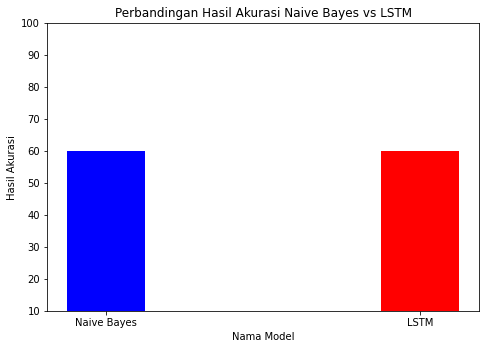

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
model_name = ['Naive Bayes', 'LSTM']
akurasi = [int(akurasi_nb*100), int(akurasi_LSTM[1]*100)]
ax.bar(model_name, akurasi, color=['blue','red'], width=0.25)
plt.xlabel('Nama Model')
plt.ylabel('Hasil Akurasi')
plt.ylim(10, 100)
plt.title('Perbandingan Hasil Akurasi Naive Bayes vs LSTM')

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(city, rating, color=['blue','red', 'orange', 'green', 'purple'])
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Perbandingan Rata-Rata Rating Berdasarkan Kota')
plt.ylim((4, 4.6))